# PyTorch Computer Vision

## 1.Required Computer vision libraries in PyTorch

* `torchvision` - main library for PyTorch computer vision. To know more about torchvision [click here](https://pytorch.org/vision/stable/index.html)
* `torchvision.datasets` - getting datasets from this module and loading required datas to train the computer vision models
* `torchvision.models` - getting pretrained computer vision models to covering our own computer vision problems (Transfer Learning)
* `torchvision.transforms` - functions that transform and manipulate our vision data to be suitable for use our model
* `torch.utils.data.Dataset` - Datasets class for PyTorch.
* `torch.utils.data.DataLoader` - Data loading and processing

This notebook was referenced from Daniel Bourke's PyTorch course. If you want to know about him [click here](https://github.com/mrdbourke)

In [ ]:
# import PyTorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib
import matplotlib.pyplot as plt

print(f"troch version: {torch.__version__}, torchvision version: {torchvision.__version__}")

troch version: 2.1.0+cu118, torchvision version: 0.16.0+cu118


In [ ]:
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
!nvidia-smi

Sun Nov 12 11:12:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 2.Getting a dataset (FashionMNIST)

Dataset to be used is FashionMNIST from torchvision.datasets.

In [10]:
# training data
train_data = datasets.FashionMNIST(root="data", # where to download data to?
                                   train=True, # train datasets will be imported
                                   download=True, # download
                                   transform=ToTensor(), # which transform type do we want to use
                                   target_transform=None # which transform type do we want to use
                                  )

test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None)

100%|██████████| 26421880/26421880 [00:00<00:00, 114170591.27it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 5516460.16it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 67687917.56it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4401197.92it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



### 2.1 Checking features of dataset

In [ ]:
# training sample
image, label = train_data[0]
image, label

In [12]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [13]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [14]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [15]:
image.shape,label

(torch.Size([1, 28, 28]), 9)

### 2.2 Visualizing data

image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

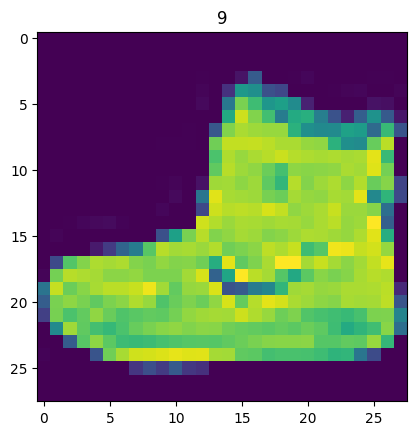

In [52]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.reshape(28,28,1)) # plt expects colour channels last and width-height. But image is type of tensor and colour channel first.  thats why we use reshape !!!
# we can also use image.squeeze() method to drop singular dimensions and its still works with plt
plt.title(label)

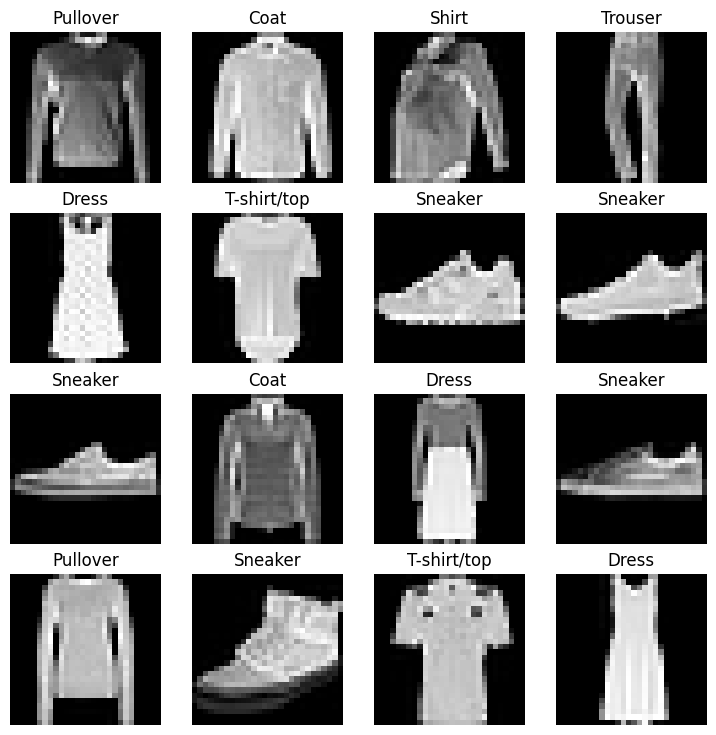

In [53]:
# plotting image
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.reshape(28,28,1), cmap="gray")
  plt.title(class_names[label])
  plt.axis("off")

## 3.Implementing DataLoader

The data format is in the form of PyTorch datasets. DataLoader converts the oncern datasets into a PyThon iterable. This provides us to turn our data into batches. The benefits that `DataLoader`'s provides us:
1. More computational efficent while our computing hardware may not be able to reach store in memory at thousends or millions of images in one shot. Thats why we use `DataLoader` to divide it down to bach `size image` at a time (batch size of `number_of_integer` = 32, 64, 128 or etc.).
2. It give our neural network more chances to update its gradients per epoch.

In [16]:
from torch.utils.data import DataLoader

# hyperparameter
BATCH_SIZE = 32

# converts dataset into batches(iterable)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_loader = DataLoader(dataset=test_data,
                         batch_size=BATCH_SIZE,
                         shuffle=False)

train_dataloader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7a9f4042ddb0>,
 <torch.utils.data.dataloader.DataLoader at 0x7a9f4042f1f0>)

In [17]:
print(f"Train DataLoaders lenghts: {len(train_dataloader)}, Batch size: {BATCH_SIZE}")
print(f"Test DataLoaders lenghts: {len(test_loader)}, Batch size: {BATCH_SIZE}")

Train DataLoaders lenghts: 1875, Batch size: 32
Test DataLoaders lenghts: 313, Batch size: 32


In [18]:
 # inside of train dataloader
 train_features_batch, train_labels_batch = next(iter(train_dataloader))
 train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28]), Label: 2, Label size: torch.Size([])


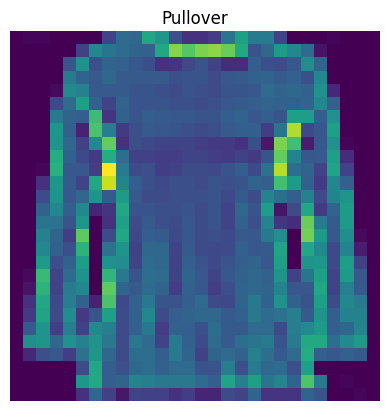

In [19]:
# sample
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.reshape(28,28,1))
plt.title(class_names[label])
plt.axis("off")
print(f"Image size: {img.shape}, Label: {label}, Label size: {label.shape}")

## 4.Building model (baseline model)

When starting to build a series of machine learning experiments, it's best practise to start with a baseline model.

A baseline model is a simple model we will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [54]:
# creating flatten layer.
flatten_model = nn.Flatten()

# getting a simple sample
x = train_features_batch[0]

# flatten the sample
output = flatten_model(x) # forward pass

print(f"shape before flattenning: {x.shape} -> [color_channels, height, width]")
print(f"shape after flattening: {output.shape} -> [color_channels, height*width]")

shape before flattenning: torch.Size([1, 28, 28]) -> [color_channels, height, width]
shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [ ]:
output

In [56]:
from torch import nn
class FashionMNISTModel(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [57]:
torch.manual_seed(42)
# setup model
fashion_model_v1 = FashionMNISTModel(input_shape=28*28, hidden_units=10, output_shape=len(class_names))
fashion_model_v1

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [59]:
dummy_x = torch.rand([1, 1, 28, 28])
fashion_model_v1(dummy_x),fashion_model_v1(dummy_x).shape

(tensor([[-0.1680,  0.2322,  0.2701,  0.0274,  0.6386,  0.3092,  0.3212,  0.2810,
          -0.1581, -0.1608]], grad_fn=<AddmmBackward0>),
 torch.Size([1, 10]))

### 4.1 Setup loss, optimizer and evaluation functions

* Loss function - Since we're working with multi-class datas, the loss function will be `nn.CrossEntropyLoss()`.
* optimizer - The optimizer function will be `torch.optim.SGD()` (stochastic gradient descent).
* Evaluation metric - Since we're working on a classification problem, accuracy metric will be used as our evaluation metric.

In [60]:
# calculate accuracy - out of 100 examples, what percentage does or model get right ?
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [61]:
# setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=fashion_model_v1.parameters(),lr=0.1)

### 4.2 Creating a function to time the model

Two of the main things where developers will often track are:
1. Model's performance (loss and accuracy values etc).
2. How fats it runs.

In [62]:
from timeit import default_timer as timer
def train_time_fn(start: float, end: float, device: torch.device = None):
  """ Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()

# code here

end_time = timer()
elapsed_time = train_time_calc(start=start_time, end=end_time, device=device)

Train time on cuda: 0.000 seconds


### 4.3 Creating training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing bacthes, perform testing steps, calculate the test loss *per batch*
4. Print out result metrics
5. Time it all (optional).

In [63]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)

train_time_start_on_device = timer()

# epochs
epochs = 5

# creating training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n______")

  ### Train
  train_loss = 0

  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    fashion_model_v1.train()

    # forward
    y_pred = fashion_model_v1(X)

    # calculate the loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumulate train loss

    # optimizer.zero_grad()
    optimizer.zero_grad()

    # loss backward (back propagation)
    loss.backward()

    # gradient descenting (optimizer step)
    optimizer.step()

    # print out metrics
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples.")

  # Divide total train loss by lenght of train dataloader
  train_loss /= len(train_dataloader)

  ### Test
  test_loss, test_acc = 0, 0
  fashion_model_v1.eval()
  with torch.inference_mode():
    for X, y in test_loader:
      # forward
      test_pred = fashion_model_v1(X)

      # calculate loss (accumulatively)
      test_loss += loss_fn(test_pred,y)

      # calculate accuracy
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    # calculate the test loss average per batch
    test_loss /= len(test_loader)

    # calculate the test acc average per batch
    test_acc /= len(test_loader)

  # printing result metrics
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# calculate training time
train_time_end_on_device = timer()

total_train_time_fashion_model_v1 = train_time_fn(start=train_time_start_on_device, end=train_time_end_on_device, device=str(next(fashion_model_v1.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
______
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
______
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
______
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Epoch: 3
______
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.4425 | Test loss: 0.4631, Test acc: 83.7460
Epoch: 4
______
Looked at 0 / 60000 samples.
Looked at 1

## 5.Makeing predictions and getting the modle's results

In [64]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """ Returns a dictionory containing the results of model predicting on data loader """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # make predictions
      y_pred = model(X)

      # accumulate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    # scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__,# only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

In [65]:
# calculate the model's results on test dataset
fashion_model_v1_results = eval_model(model=fashion_model_v1, data_loader=test_loader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
fashion_model_v1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.4686937928199768,
 'model_acc': 83.2667731629393}

## 6.Setting up device agnostic code and building GPU based model


In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
!nvidia-smi

Sun Nov 12 11:13:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 6.1 Building sequential neural network class

In [66]:
from torch.nn.modules.activation import ReLU
# creating a class model with non-linear layers
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )
  def forward(self,x: torch.Tensor):
    return self.layer_stack(x)

In [67]:
# create an  instance of modelV2
torch.manual_seed(42)
model_1 = FashionMNISTModelV2(input_shape=28*28, # flatten !!!
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.2 Creating loss, optimizer and evaluation functions

In [ ]:
# calculate accuracy - out of 100 examples, what percentage does or model get right ?
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [ ]:
from timeit import default_timer as timer
def train_time_fn(start: float, end: float, device: torch.device = None):
  """ Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [68]:
# loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 6.3 Functionizing training and evaluation/testing loops

Creating a function for:
* training loop - `train_step()`
*testing loop - `test_step()`

In [69]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training with model trying to learn on data_loader"""
  train_loss, train_acc = 0, 0

  # model training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(data_loader):
    # putting datas on device
    X, y = X.to(device), y.to(device)

    # forward (logits format)
    y_pred = model(X)

    # calculate the loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # logits -> prediction labels

    # optimizer.zero_grad()
    optimizer.zero_grad()

    # loss backward (back propagation)
    loss.backward()

    # gradient descenting (optimizer step)
    optimizer.step()

  # Divide total train loss and acc by lenght of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%.")

In [70]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  """Performs a testing with model trying to evaluate on data_loader"""
  test_loss, test_acc = 0, 0
  # putting model in valuation mode
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # putting datas on device
      X, y = X.to(device), y.to(device)

      # forward
      test_pred = model(X) # output is in logit format

      # calculate loss (accumulatively)
      test_loss += loss_fn(test_pred,y)

      # calculate accuracy
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1)) # logits -> labels

    # calculate the test loss average per batch
    test_loss /= len(data_loader)

    # calculate the test acc average per batch
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%.")

In [71]:
from tqdm.auto import tqdm

torch.manual_seed(42)

# measure time
from timeit import default_timer as Timer
train_time_start_on_gpu = timer()

# set epochs
epochs = 3

# create a optimization and evaluation loop using train_step and test_step
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_loader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = train_time_fn(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=device)
print(f"elapsed training time: {total_train_time_model_1}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0

Train loss: 1.09199 | Train acc: 61.34%.
Test loss: 0.95636 | Test acc: 65.00%.
Epoch: 1

Train loss: 0.78101 | Train acc: 71.93%.
Test loss: 0.72227 | Test acc: 73.91%.
Epoch: 2

Train loss: 0.67027 | Train acc: 75.94%.
Test loss: 0.68500 | Test acc: 75.02%.
Train time on cuda: 31.217 seconds
elapsed training time: 31.216566446999877


In [72]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device):
  """ Returns a dictionory containing the results of model predicting on data loader """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # device agnostic code
      X, y = X.to(device), y.to(device)

      # make predictions
      y_pred = model(X)

      # accumulate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    # scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__,# only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

In [73]:
from torch.types import Device
model_1_results = eval_model(model=model_1,data_loader=test_loader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [74]:
model_1_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

##7.Creating Convolutional Neural Network model (CNN) (ConvNets)

CNN's are very capable to find patterns in visual data.

To kown what's happening inside a CNN [click here](https://ayyucekizrak.medium.com/deri%CC%87ne-daha-deri%CC%87ne-evri%C5%9Fimli-sinir-a%C4%9Flar%C4%B1-2813a2c8b2a9)

In [9]:
# import PyTorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"troch version: {torch.__version__}, torchvision version: {torchvision.__version__}\n")
print(f"device: {device}")

troch version: 2.1.0+cu118, torchvision version: 0.16.0+cu118

device: cuda


In [20]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training with model trying to learn on data_loader"""
  train_loss, train_acc = 0, 0

  # model training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(data_loader):
    # putting datas on device
    X, y = X.to(device), y.to(device)

    # forward (logits format)
    y_pred = model(X)

    # calculate the loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # logits -> prediction labels

    # optimizer.zero_grad()
    optimizer.zero_grad()

    # loss backward (back propagation)
    loss.backward()

    # gradient descenting (optimizer step)
    optimizer.step()

  # Divide total train loss and acc by lenght of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%.")

In [21]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  """Performs a testing with model trying to evaluate on data_loader"""
  test_loss, test_acc = 0, 0
  # putting model in valuation mode
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # putting datas on device
      X, y = X.to(device), y.to(device)

      # forward
      test_pred = model(X) # output is in logit format

      # calculate loss (accumulatively)
      test_loss += loss_fn(test_pred,y)

      # calculate accuracy
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1)) # logits -> labels

    # calculate the test loss average per batch
    test_loss /= len(data_loader)

    # calculate the test acc average per batch
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%.")

In [22]:
# calculate accuracy - out of 100 examples, what percentage does or model get right ?
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [23]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device):
  """ Returns a dictionory containing the results of model predicting on data loader """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # device agnostic code
      X, y = X.to(device), y.to(device)

      # make predictions
      y_pred = model(X)

      # accumulate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    # scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__,# only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

In [38]:
from timeit import default_timer as timer
def train_time_fn(start: float, end: float, device: torch.device = None):
  """ Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [39]:
# creating convolutional neural network
class FashionMNISTModelV3(nn.Module):
  """
   Model architecture that replicates the TinyVGG
   model from CNN explainer website
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # there is a trick to calculating in_features after applying flatten layer !!!!!!! so important thing
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x

In [40]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV3(input_shape=1, output_shape=len(class_names), hidden_units=10).to(device) # class_names is defined above of the notebook

In [ ]:
model_2.state_dict()

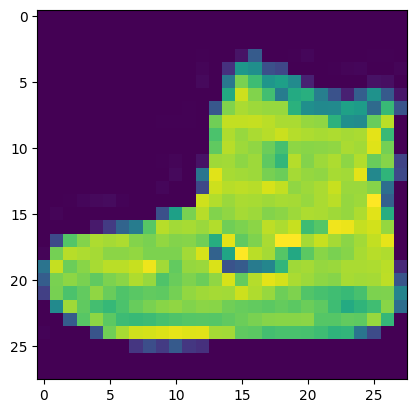

In [42]:
plt.imshow(image.reshape(28,28,1))

In [43]:
image_gpu = torch.randn(size=(1,28,28)).to(device) # this is a sample
image_gpu.shape

torch.Size([1, 28, 28])

In [44]:
model_2(image_gpu.unsqueeze(0)) # sample

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

If you wnt to know about `nn.Conv2d()` [click here](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d)



In [45]:
torch.manual_seed(42)

# create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"single image shape: {test_image.shape}")
print(f"test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
single image shape: torch.Size([3, 64, 64])
test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [46]:
# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=(3,3), stride=1, padding=0)

# pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

### 7.2 Stepping through `nn.MaxPool2D()`

If you want to know about `nn.MaxPool2D()` [click here](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d)



In [47]:
test_image.shape, test_image.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [48]:
print(f"test image original shape: {test_image.shape}")
print(f"test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"shape after going through conv_layer(): {test_image_through_conv.shape}")

# pass data through max_pool_layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")


test image original shape: torch.Size([3, 64, 64])
test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


### 7.3 Setting up loss and optimizer function for our CNN model

In [49]:
# setting up loss and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)


### 7.4 Training and testing the model

In [50]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# time measure
train_time_start_model_2 = timer()

# training and testing the model with using defined functions
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}\n")
  # training
  train_step(model=model_2,
             data_loader=train_dataloader,
             accuracy_fn=accuracy_fn,
             optimizer=optimizer,
             loss_fn=loss_fn,
             device=device)
  # testing
  test_step(model=model_2,
            data_loader=test_loader,
            accuracy_fn=accuracy_fn,
            loss_fn=loss_fn,
            device=device)

# time measure
train_time_end_model_2 = timer()
total_train_time_model_2 = train_time_fn(start=train_time_start_model_2, end=train_time_end_model_2, device=device)
print(f"elapsed training time: {total_train_time_model_2}")

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0

Train loss: 0.59277 | Train acc: 78.48%.
Test loss: 0.39423 | Test acc: 85.86%.
epoch: 1

Train loss: 0.36105 | Train acc: 87.04%.
Test loss: 0.34995 | Test acc: 87.03%.
epoch: 2

Train loss: 0.32376 | Train acc: 88.25%.
Test loss: 0.32664 | Test acc: 88.17%.
Train time on cuda: 36.728 seconds
elapsed training time: 36.72786340199991


In [51]:
# getting the model' results
model_2_results = eval_model(model=model_2,
                             accuracy_fn=accuracy_fn,
                             loss_fn=loss_fn,
                             data_loader=test_loader,
                             device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV3',
 'model_loss': 0.3266369700431824,
 'model_acc': 88.16892971246007}

## 8.Comparing model results and training time

In [75]:
import pandas as pd
compare_results = pd.DataFrame([fashion_model_v1_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModel,0.468694,83.266773
1,FashionMNISTModelV2,0.685001,75.019968
2,FashionMNISTModelV3,0.326637,88.168930


In [77]:
compare_results.keys

<bound method NDFrame.keys of             model_name  model_loss  model_acc
0    FashionMNISTModel    0.468694  83.266773
1  FashionMNISTModelV2    0.685001  75.019968
2  FashionMNISTModelV3    0.326637  88.168930>

In [78]:
# adding training time to results comparison
compare_results["training_time"] = [total_train_time_fashion_model_v1,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModel,0.468694,83.266773,49.065387
1,FashionMNISTModelV2,0.685001,75.019968,31.216566
2,FashionMNISTModelV3,0.326637,88.168930,36.727863


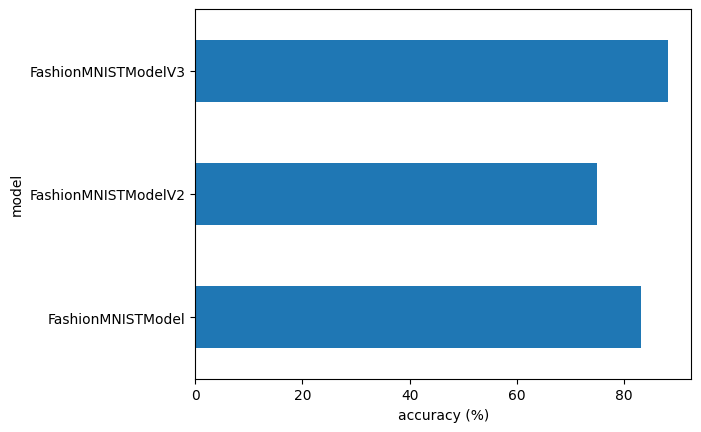

In [79]:
# visualizing model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 9.Making and evaluating random predictions with best model

In [80]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare sample ()
      sample = torch.unsqueeze(sample, dim =0).to(device)

      # forward pass
      pred_logit = model(sample)

      # getting prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # getting pred_prob aff the gpu for further calculations
      pred_probs.append(pred_prob.cpu())

  # stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [85]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# view the first sample shape
print(f"sample shape: {test_samples[0].shape}")


sample shape: torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

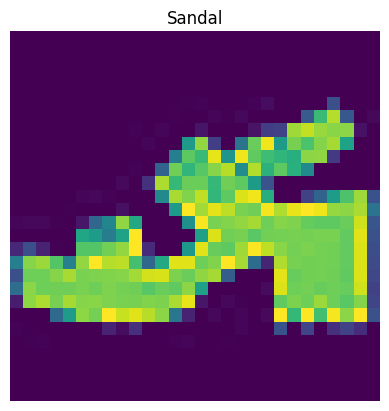

In [89]:
# plotting sample
plt.imshow(test_samples[0].reshape(28,28))
plt.title(class_names[test_labels[0]])
plt.axis("off")

In [91]:
# make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

#view pred probs
pred_probs[:5]

tensor([[6.0093e-08, 1.0283e-08, 4.1603e-08, 8.3048e-08, 1.0823e-09, 9.9994e-01,
         6.7784e-08, 2.7523e-06, 2.1690e-05, 3.8889e-05],
        [1.0664e-01, 2.4709e-01, 2.8496e-03, 1.5175e-01, 6.6255e-02, 3.2472e-04,
         4.2428e-01, 4.4303e-04, 1.2032e-04, 2.4207e-04],
        [1.3251e-05, 2.1145e-06, 3.7696e-05, 8.1663e-06, 6.7180e-06, 6.8487e-04,
         6.0507e-06, 7.9581e-01, 1.1084e-03, 2.0232e-01],
        [6.1438e-04, 6.6832e-05, 3.2704e-01, 6.5988e-04, 6.6939e-01, 2.3007e-06,
         2.0840e-03, 2.5282e-05, 1.0824e-04, 1.3365e-05],
        [9.6525e-02, 1.1750e-05, 8.0819e-05, 8.7890e-01, 1.5247e-04, 2.7712e-07,
         2.4257e-02, 2.1652e-05, 4.9251e-05, 3.7367e-06]])

In [95]:
# convet pred_probs to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 6, 7, 4, 3, 0, 4, 7, 1])

In [94]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [102]:
class_names[pred_classes[0]], class_names[test_labels[0]]

('Sandal', 'Sandal')

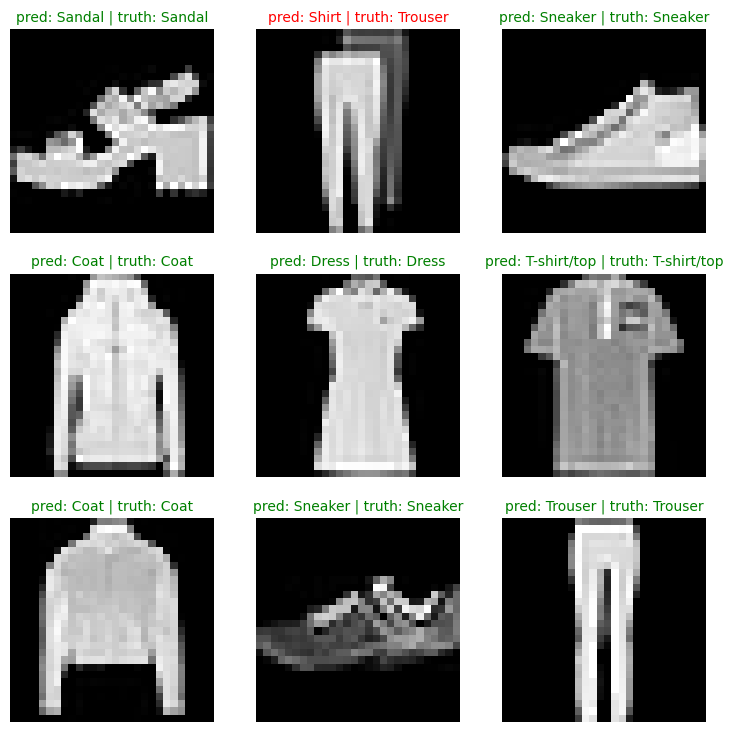

In [106]:
# plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for index, sample in enumerate(test_samples):
  # subplot
  plt.subplot(nrows, ncols, index+1)

  # plot target img
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction
  pred_label = class_names[pred_classes[index]]

  # truth label
  truth_label = class_names[test_labels[index]]

  # creating a title for the plot
  title_text = f"pred: {pred_label} | truth: {truth_label}"

  # checking equality between truth and pred labels
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green colour will be showed if prediction is correct
  else:
    plt.title(title_text, fontsize=10, c="r") # red colour will be showed if prediction is not correct
  plt.axis("off")

## 10.Confusion matrix for further prediction evaluation

Confusion matrix is an another way of evaluating your classification models with visually. To know more abut confusion matrix [click here](https://christianbernecker.medium.com/how-to-create-a-confusion-matrix-in-pytorch-38d06a7f04b7)

1. Make predictions with the trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

we are not gonna importing confusion matrix for this notebook cause of cutting our runetime and deleting all weight and datas out of colab server. But if you want to know more about confusion matrix you can observing Daniel Bourke's confusion matrix codes -> [https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb)

In [108]:
import mlxtend
mlxtend.__version__

'0.22.0'

In [111]:
from tqdm.auto import tqdm

# predictions

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_loader, desc="making predictions"):
    # device agnostic code
    X, y = X.to(device), y.to(device)

    # forward
    y_logit = model_2(X)

    # logit -> pred_porob -> pred_label
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    # putting predictions on cpu for evaluation
    y_preds.append(y_pred.cpu())

# concatenating list into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

## 11.Saving the CNN model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# model save path
MODEL_SAVE_PATH = "your path here .pth"

# saving the model atate dict
print(f"model is saving to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

In [115]:
drive.flush_and_unmount()